In [1]:
import os
import pandas as pd
import numpy as np
import random
from pandas import DataFrame
from datetime import datetime
import xgboost as xgb
import matplotlib
from matplotlib import pyplot as plt
from sklearn.metrics import r2_score


# input file path
workdir = "D://DrugResponsivenessGuideline_log//Github//200914_reupload//Dataset//Scenario5_individual_model_approach"

In [2]:
drug_list = ["AEW541","Nilotinib","17-AAG","PHA-665752","Lapatinib","Nutlin-3"
            ,"AZD0530","PF2341066","L-685458","ZD-6474","Panobinostat","Sorafenib"
            ,"Irinotecan","Topotecan","LBW242","PD-0325901","PD-0332991","Paclitaxel"
            ,"PLX4720","RAF265","TAE684","TKI258","Erlotinib","AZD6244"]

AEW541_//n
train_X shape: (392, 18988)
392 train samples
98 test samples
StartTime : 2020-09-18 10:02:46.923115
[10:02:46] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
EndTime : 2020-09-18 10:03:32.077392
AEW541’s final rmse value is = 0.748134
AEW541 R-squared value is = 0.095475
Nilotinib_//n
train_X shape: (326, 18988)
326 train samples
81 test samples
StartTime : 2020-09-18 10:03:32.354628
[10:03:32] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
EndTime : 2020-09-18 10:04:08.902896
Nilotinib’s final rmse value is = 1.086551
Nilotinib R-squared value is = -0.106118
17-AAG_//n
train_X shape: (392, 18988)
392 train samples
98 test samples
StartTime : 2020-09-18 10:04:09.268919
[10:04:09] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
EndTime : 2020-09-18 10:04:54.662530
17-AAG’s final rmse value is = 1.081337
1

EndTime : 2020-09-18 10:18:39.328391
AZD6244’s final rmse value is = 1.242245
AZD6244 R-squared value is = 0.065537


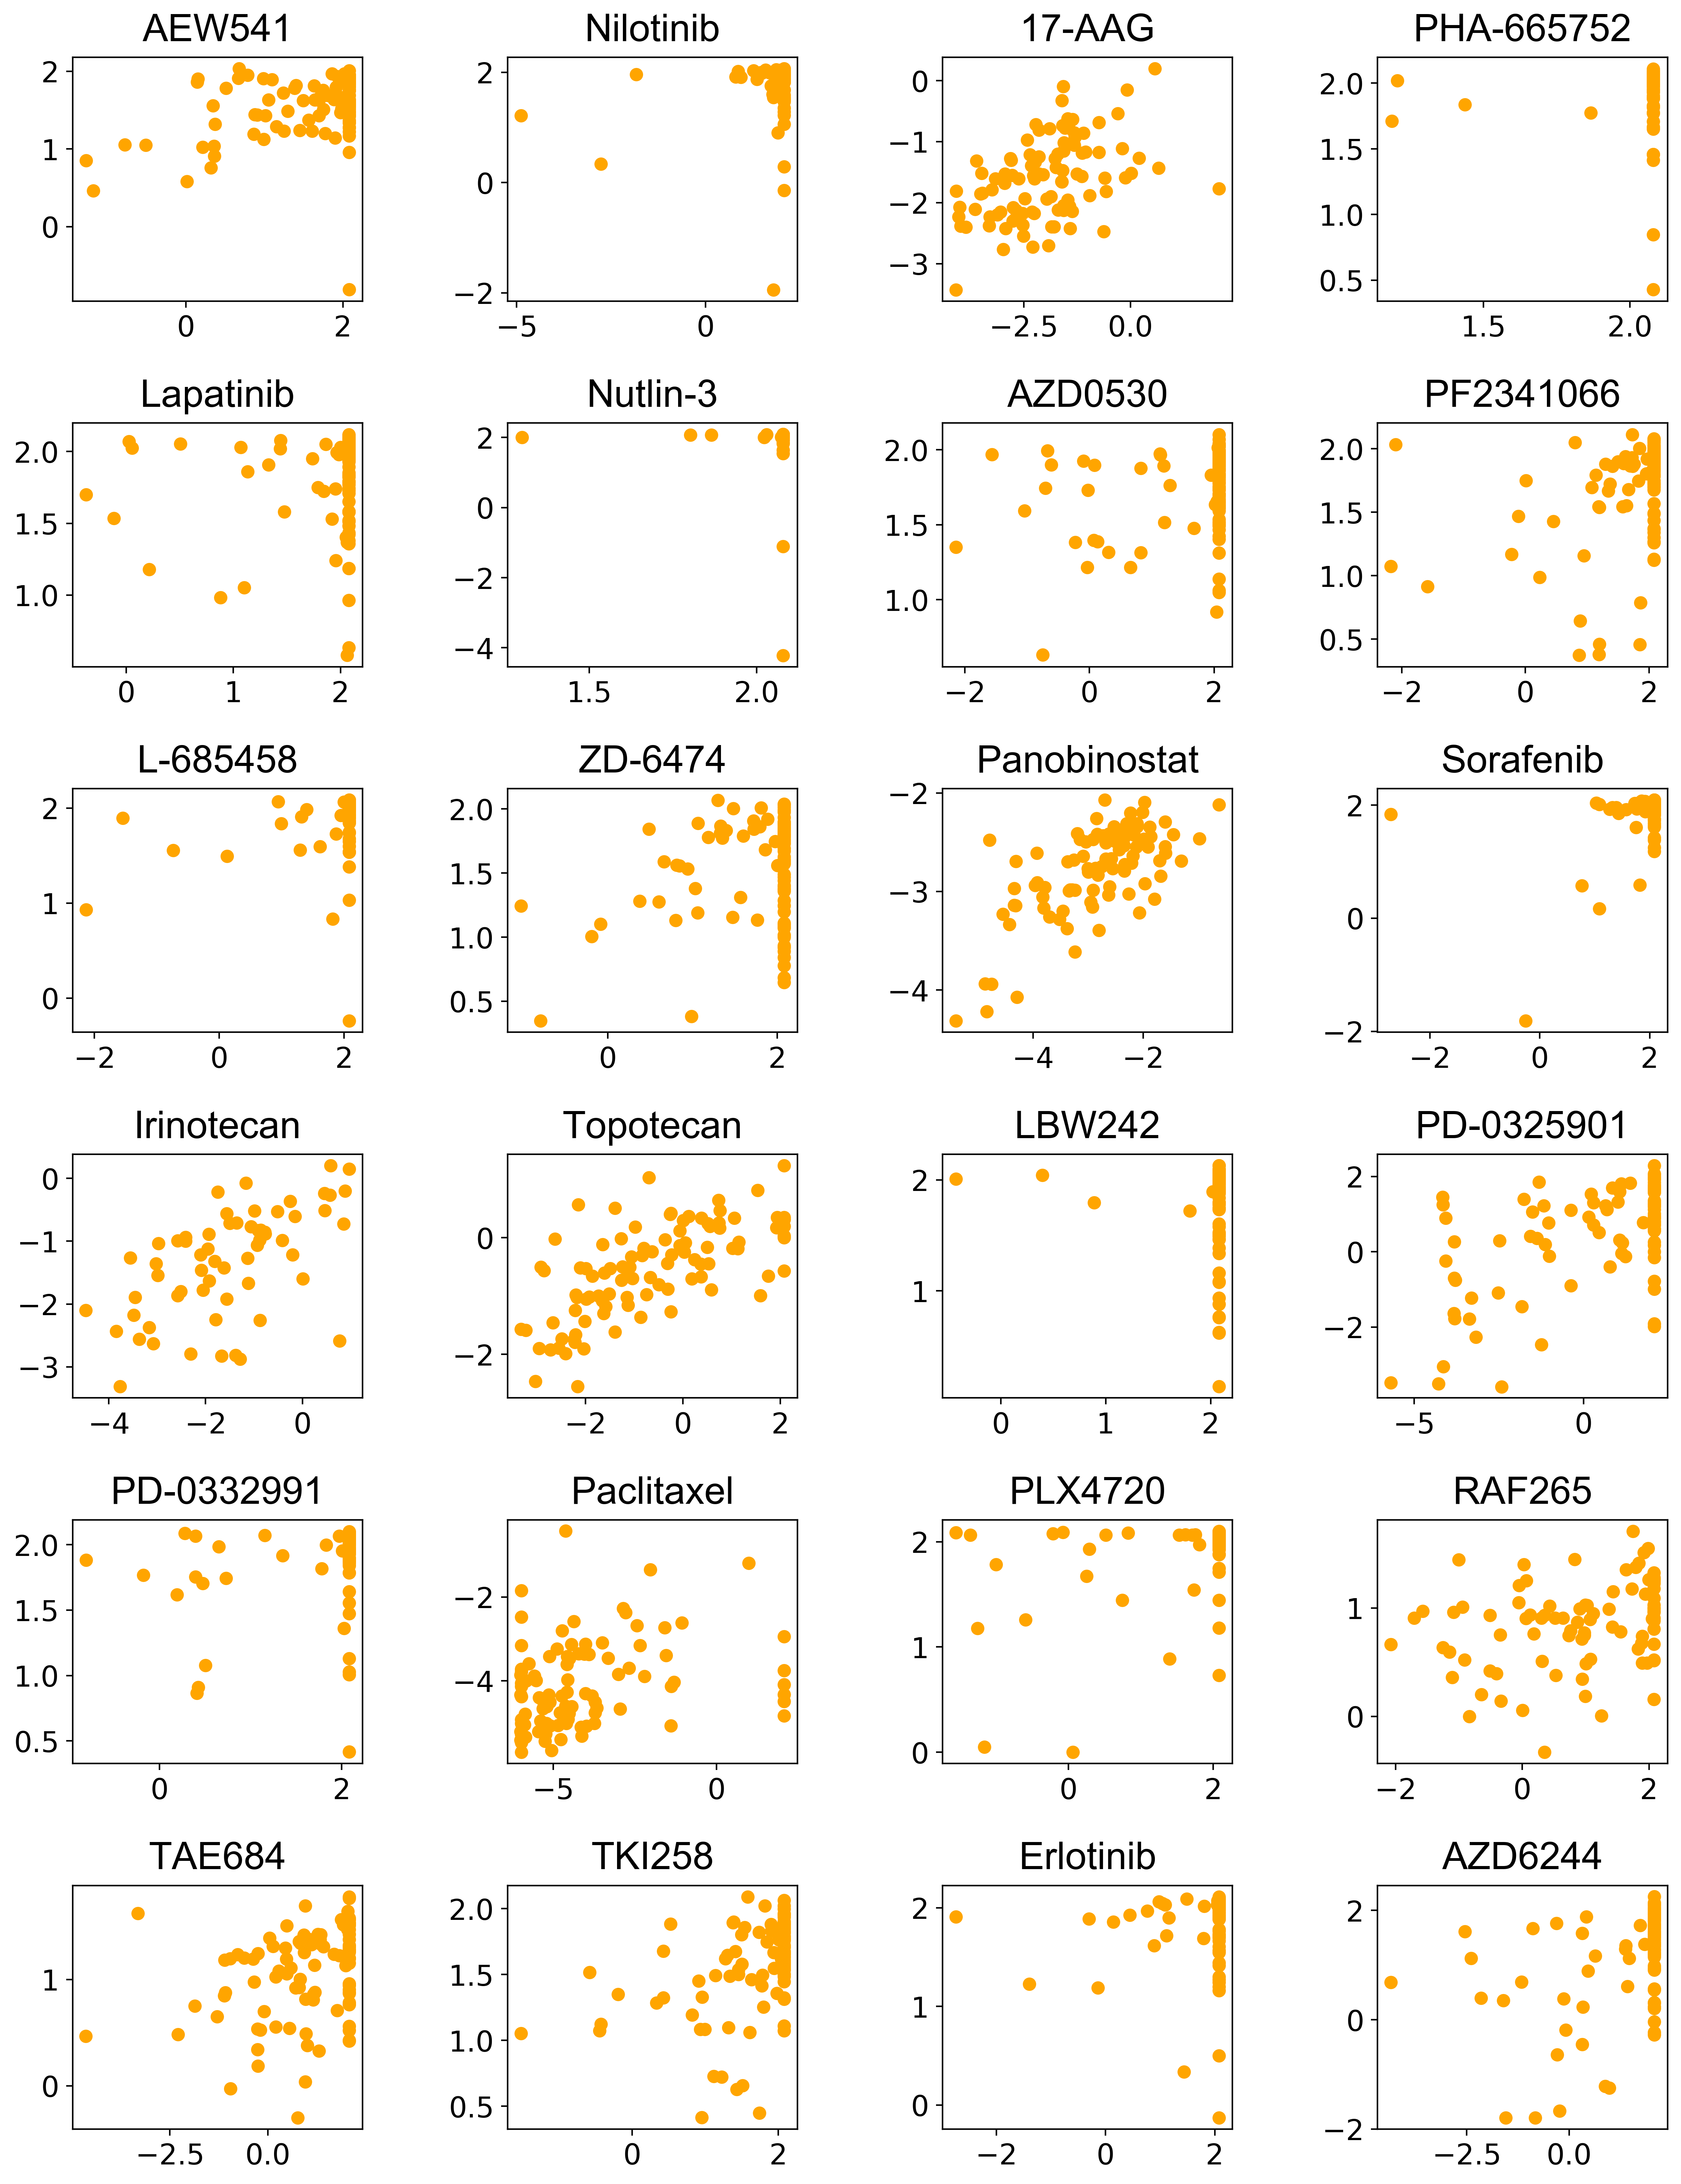

In [3]:
rmselist = []
r2list = []

# drug_list = ["Topotecan"]
fig = plt.figure(figsize=(15,20),dpi=400)
fig.subplots_adjust(hspace=0.5, wspace=0.5)
num = 1
for dname in drug_list:
    
    print('%s_//n' % dname)
    # read input file and index file for training and test set
    dataset = np.load(workdir + "//200914_EC11K_%s.npz" % dname)
    ss0 = np.load(workdir + '//200914_EC11K_%s_0_8_2.npz' % dname)

    # input and index file assign
    x = dataset['x']
    y = dataset['y']
    # y_linear = dataset['y_lnIC50']
    ss0_train = ss0['train']
    ss0_test = ss0['test']
    
    # training and test dataset assign
    train_X, train_y = x[ss0_train], y[ss0_train]
    test_X, test_y = x[ss0_test], y[ss0_test]

    # data typing and the number of dataset
    train_X = train_X.astype('float32')
    test_X = test_X.astype('float32')
    # train_X /= 255
    # test_X /= 255
    print('train_X shape:', train_X.shape)
    print(train_X.shape[0], 'train samples')
    print(test_X.shape[0], 'test samples')
    
    # model fitting
    StartTime8 = datetime.now()
    print("StartTime :", StartTime8)
    model = xgb.XGBRegressor()
    model.fit(train_X,train_y)
    EndTime8 = datetime.now()
    print("EndTime :", EndTime8)


    predicted_classes = model.predict(test_X)
    predicted_value = predicted_classes
        
    
    # saving predicted ln(IC50)s and ln(IC50)s in the test set
    a = pd.DataFrame(predicted_value)
    b = pd.DataFrame(test_y)
    c = pd.concat([a,b], axis=1)
    c.columns=["Predicted","Test"]
    workdir = "D://DrugResponsivenessGuideline_log//Github//200914_reupload//Result//Scenario5_individual_approach//Table//XGB"
    c.to_csv(workdir + '//200915_scenario5_XGB_%s_pred_and_val_result.csv' % dname, index=False)

    # RMSE
    rse = ((b[0]-a[0])**2).sum()
    mse = rse / len(b)
    rmse = np.sqrt(mse)
    print("%s’s final rmse value is = %f" % (dname,rmse))
    
    # R-squared value
    r2_value = r2_score(b,a)
    print("%s R-squared value is = %f" % (dname,r2_value))
    rmselist.append(rmse)
    r2list.append(r2_value)
          
    plt.subplot(6,4,num)
    plt.scatter(test_y,predicted_value,c='orange')
    plt.title(dname,fontdict ={'fontsize' : 20},fontname="Arial",y = 1.02)
    plt.tick_params(labelsize=15)
    
    num += 1
#     plt.scatter(test_y,predicted_value,c='red')
#     plt.xlabel('test_IC50_value')
#     plt.ylabel('predicted_IC50_value')
#     plt.savefig(workdir + '//%s_test_scatterplot.png' % dname)
    
    workdir = "D://DrugResponsivenessGuideline_log//Github//200914_reupload//Dataset//Scenario5_individual_model_approach"
workdir = "D://DrugResponsivenessGuideline_log//Github//200914_reupload//Result//Scenario5_individual_approach//Figure"    

plt.savefig(workdir +'//200915_scenario5_XGB_plot.png', dpi=400)

In [4]:
num

25

In [5]:
print("This is lasso regression with expression dataset for each drugs")
a = pd.DataFrame(drug_list)
b = pd.DataFrame(rmselist)
c =pd.DataFrame(r2list)
result = pd.concat([a,b,c],axis=1)
result.columns = ['Drug','RMSE','R2value']

This is lasso regression with expression dataset for each drugs


In [6]:
result

,Drug,RMSE,R2value
0,AEW541,0.748134,0.095475
1,Nilotinib,1.086551,-0.106118
2,17-AAG,1.081337,0.100036
3,PHA-665752,0.281316,-2.979270
4,Lapatinib,0.598046,-0.293585
5,Nutlin-3,0.722482,-70.209260
6,AZD0530,0.945481,0.043889
7,PF2341066,0.783995,0.105012
8,L-685458,0.659312,0.054217
9,ZD-6474,0.700615,-0.159959


In [7]:
workdir = "D://DrugResponsivenessGuideline_log//Github//200914_reupload//Result//Scenario5_individual_approach" 
result.to_csv(workdir +'//200915_scenario5_XGB_24drugs_metrics.csv', index=False)